# K-Means Clustering - An Unsupervised Machine Learning Algorithm
The purpose of this algorithm is to divide n observations into k clusters repeatedly until no more groups can be formed. 
This below implementation is based on Eucledian distance.

Steps:
    1. Start - Randomly assign/generate k centriods 
    2. Assign - Create k clusters of observations based on distance between each point and centroid
    3. Update - Find the new centroid for each cluster based on cluster mean
    4. Repeat - Repeat step 2 and 3 until convergence

In [1]:
# import dependencies here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    "x": [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    "y": [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})
df.head()

,x,y
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54


CENTROIDS {1: [26, 16], 2: [68, 42], 3: [55, 76]}


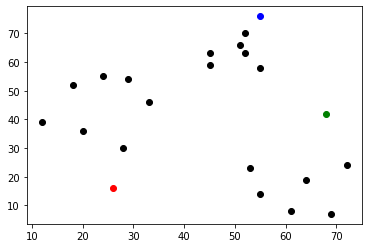

In [3]:
# Step 1 - Start/Initialize

# let number of initial clusters be 3
np.random.seed(200)
k = 3

# randomly generate k number of centroids (centroid coordinates)
centroids = {}
for i in range(1, k+1):
    centroid_x = np.random.randint(0, 80)
    centroid_y = np.random.randint(0, 80)
    centroids[i] = [centroid_x, centroid_y]
print("CENTROIDS", centroids)

plt.scatter(df["x"], df["y"], color="black")
colmap = {1: 'r', 2: 'g', 3: 'b'}
for key in centroids.keys():
    plt.scatter(*centroids[key], color=colmap[key])
plt.show()

    x   y  shortest_dist  centroid_num color
0  12  39      26.925824             1     r
1  20  36      20.880613             1     r
2  28  30      14.142136             1     r
3  18  52      36.878178             1     r
4  29  54      34.058773             3     b


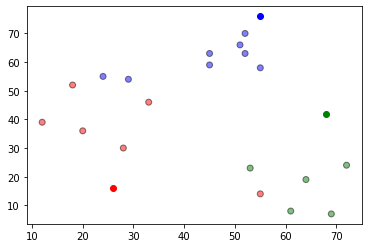

In [4]:
# Step 2 - Assign/Form Clusters

def assign_cluster(df, centriods):
    
    dist_list = []
    
    for x,y in df.values:
        
        dist = []
        temp_dict = {}
        
        for i in centroids.keys():
            dist.append(np.sqrt(
                        (x - centroids[i][0]) ** 2 + 
                        (y - centroids[i][1]) ** 2))
        temp_dict["x"] = x
        temp_dict["y"] = y
        temp_dict["shortest_dist"] = min(dist)
        temp_dict["centroid_num"] = dist.index(min(dist)) + 1
        dist_list.append(temp_dict)

    temp_df = pd.DataFrame(dist_list)
    temp_df["color"] = temp_df["centroid_num"].map(lambda x: colmap[x])
    return temp_df

dist_df = assign_cluster(df, centroids)
print(dist_df.head())
    
plt.scatter(dist_df['x'], dist_df['y'], color=dist_df["color"], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

{1: [27.666666666666668, 36.166666666666664], 2: [63.8, 16.2], 3: [44.125, 61.0]}


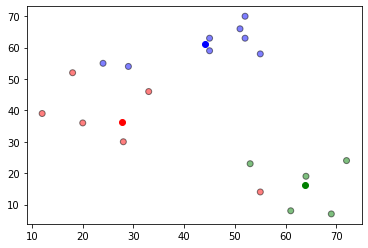

In [5]:
# Step 3: Update Centroids

import copy
old_centroids = copy.deepcopy(centroids)

def update_centroids(centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(dist_df[dist_df["centroid_num"] == i]["x"])
        centroids[i][1] = np.mean(dist_df[dist_df["centroid_num"] == i]["y"])
    return centroids

centroids = update_centroids(centroids)
print(centroids)

plt.scatter(dist_df['x'], dist_df['y'], color=dist_df["color"], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [6]:
dist_df.head()

,x,y,shortest_dist,centroid_num,color
0,12,39,26.925824,1,r
1,20,36,20.880613,1,r
2,28,30,14.142136,1,r
3,18,52,36.878178,1,r
4,29,54,34.058773,3,b


    x   y  shortest_dist  centroid_num color
0  12  39      15.920811             1     r
1  20  36       7.668478             1     r
2  28  30       6.175669             1     r
3  18  52      18.550981             1     r
4  29  54      16.666302             3     b


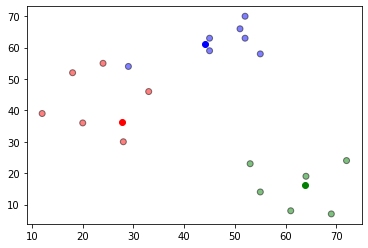

In [7]:
# Step 4: Repeat (step 2 and 3)

dist_df = assign_cluster(dist_df[["x","y"]], centroids)
print(dist_df.head())

plt.scatter(dist_df['x'], dist_df['y'], color=dist_df["color"], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

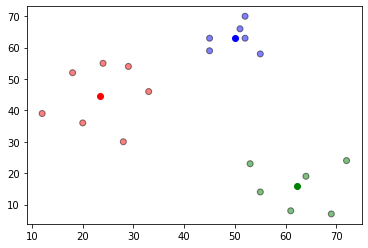

In [8]:
# step 5: Repeat until convergence

while True:
    closest_centroids = dist_df["shortest_dist"].copy(deep=True)
    centroids = update_centroids(centroids)
    dist_df = assign_cluster(dist_df[["x","y"]], centroids)
    if closest_centroids.equals(dist_df["shortest_dist"]):
        break
        
plt.scatter(dist_df['x'], dist_df['y'], color=dist_df["color"], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

The algorithm has converged with k=3. The above plot shows 3 clusters formed with 3 centroids, one each in center of each cluster.

### K-Means using Scikit Learn

In [9]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

ModuleNotFoundError: No module named 'sklearn'

In [12]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

NameError: name 'kmeans' is not defined

In [13]:
colors = map(lambda x: colmap[x+1], labels)

plt.scatter(df['x'], df['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])

NameError: name 'labels' is not defined